## Sample Analysis

In [1]:
boston <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data')

In [2]:
install.packages("dplyr")
library("dplyr")

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
install.packages("psych")
library("psych")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(ggplot2)
library(reshape2)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [5]:
colnames(boston) = c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')

In [6]:
stats <- describe(boston)
stats$trimmed <- NULL
stats$mad <- NULL
stats

,vars,n,mean,sd,median,min,max,range,skew,kurtosis,se
CRIM,1,506,3.61352356,8.6015451,0.25651,0.00632,88.9762,88.96988,5.1922223,36.59581589,0.382385321
ZN,2,506,11.36363636,23.3224530,0.00000,0.00000,100.0000,100.00000,2.2124881,3.95238731,1.036809500
INDUS,3,506,11.13677866,6.8603529,9.69000,0.46000,27.7400,27.28000,0.2932747,-1.24019490,0.304979888
CHAS,4,506,0.06916996,0.2539940,0.00000,0.00000,1.0000,1.00000,3.3857377,9.48197035,0.011291412
NOX,5,506,0.55469506,0.1158777,0.53800,0.38500,0.8710,0.48600,0.7249897,-0.08741064,0.005151391
RM,6,506,6.28463439,0.7026171,6.20850,3.56100,8.7800,5.21900,0.4012223,1.84183241,0.031235142
AGE,7,506,68.57490119,28.1488614,77.50000,2.90000,100.0000,97.10000,-0.5954162,-0.97802966,1.251369525
DIS,8,506,3.79504269,2.1057101,3.20745,1.12960,12.1265,10.99690,1.0057898,0.45759158,0.093610233
RAD,9,506,9.54940711,8.7072594,5.00000,1.00000,24.0000,23.00000,0.9988651,-0.87892910,0.387084894
TAX,10,506,408.23715415,168.5371161,330.00000,187.00000,711.0000,524.00000,0.6659891,-1.15031761,7.492388692


#### Data subset (n = 5)

In [7]:
randomSample = function(df, n){
    return (df[sample(nrow(df), n),])
}

In [8]:
samp <- randomSample(boston,5)
samp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
353,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
408,11.95110,0,18.10,0,0.659,5.608,100.0,1.2852,24,666,20.2,332.09,12.13,27.9
150,2.73397,0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
394,8.64476,0,18.10,0,0.693,6.193,92.6,1.7912,24,666,20.2,396.90,15.17,13.8
92,0.03932,0,3.41,0,0.489,6.405,73.9,3.0921,2,270,17.8,393.55,8.20,22.0


#### Z-scores of sample data set

Z-score = $(x_i - \mu)/\sigma $


In [9]:
z_score <- function (feat, mean, sd){
    z <- (feat - mean)/sd
    return(z)
}

In [11]:
crim <- z_score(samp$CRIM, stats['CRIM','mean'], stats['CRIM', 'sd'])
zn <- z_score(samp$ZN, stats['ZN', 'mean'], stats['ZN', 'sd'])
indus <- z_score(samp$INDUS, stats['INDUS','mean'], stats['INDUS','sd'])
chas <- z_score(samp$CHAS, stats['CHAS', 'mean'], stats['CHAS','sd'])
nox <- z_score(samp$NOX, stats['NOX', 'mean'], stats['NOX', 'sd'])
rm <- z_score(samp$RM, stats['RM','mean'], stats['RM','sd'])
age <- z_score(samp$AGE, stats['AGE','mean'], stats['AGE','sd'])
dis <-z_score(samp$DIS, stats['DIS','mean'], stats['DIS','sd'])
rad <- z_score(samp$RAD, stats['RAD','mean'], stats['RAD','sd'])
tax <- z_score(samp$TAX, stats['TAX','mean'], stats['TAX','sd'])
ptratio <-z_score(samp$PTRATIO, stats['PTRATIO','mean'], stats['PTRATIO','sd'])
b <-z_score(samp$B, stats['B','mean'], stats['B','sd'])
lstat <- z_score(samp$LSTAT, stats['LSTAT','mean'], stats['LSTAT','sd'])
medv <- z_score(samp$MEDV, stats['MEDV','mean'], stats['MEDV','sd'])


In [25]:
z_samp = data.frame(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv)
rownames(z_samp) = rownames(samp)
z_samp

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
353,-0.4116799,2.0853880,-1.377011,-0.2723291,-1.2400582,-0.5702030,-1.7789317,3.2840500,-0.6373311,0.01639310,-0.07184181,0.39055831,-0.68100005,-0.42761355
408,0.9693115,-0.4872402,1.014995,-0.2723291,0.9001297,-0.9630200,1.1163897,-1.1919222,1.6596029,1.52941294,0.80577843,-0.26928165,-0.07324727,0.58357431
150,-0.1022553,-0.4872402,1.230727,-0.2723291,2.7296452,-0.9786758,0.9352101,-1.0777090,-0.5224844,-0.03107419,-1.73470120,-0.05284012,1.23188083,-0.77554916
394,0.5849224,-0.4872402,1.014995,-0.2723291,1.1935426,-0.1304187,0.8535016,-0.9516232,1.6596029,1.52941294,0.80577843,0.44061589,0.35245975,-0.94951696
92,-0.4155304,-0.4872402,-1.126295,-0.2723291,-0.5669346,0.1713104,0.1891763,-0.3338269,-0.8670245,-0.82021787,-0.30279450,0.40392161,-0.62358562,-0.05793197


#### Heat Map & Bar Plot

Comparing samp and z_samp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


<ggproto object: Class FacetGrid, Facet>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map: function
    map_data: function
    params: list
    render_back: function
    render_front: function
    render_panels: function
    setup_data: function
    setup_params: function
    shrink: TRUE
    train: function
    train_positions: function
    train_scales: function
    super:  <ggproto object: Class FacetGrid, Facet>

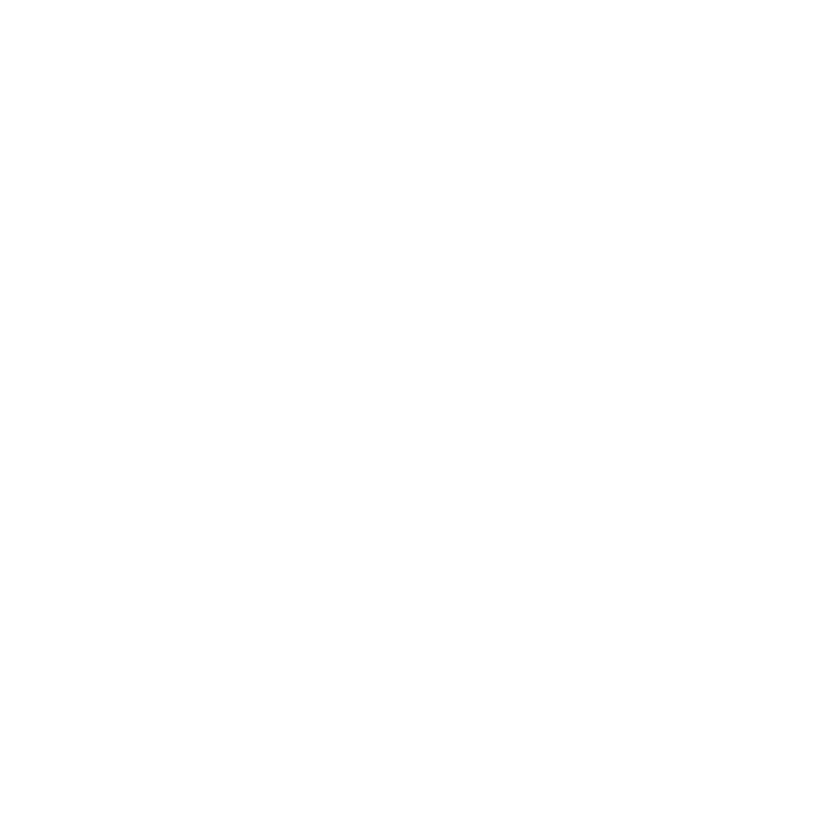

In [27]:
ggplot(z_samp, aes()) +
    geom_histogram(aes())
    facet_grid(.~row.names(z_samp))

In [21]:
cormat <- round(cor(samp_z),2)

In [22]:
melt_cormat <- melt(cormat)

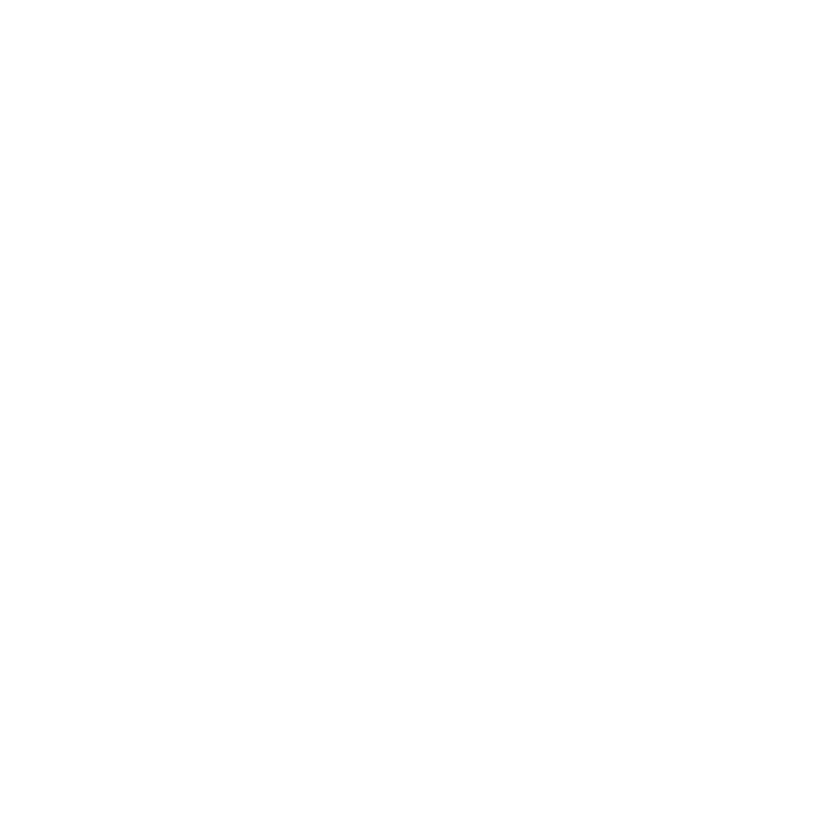

In [23]:
ggplot(data = melt_cormat, aes(x=row.names(), var1, fill=value))+
    geom_tile(color = "white")+

    scale_fill_gradient2(low = "lightblue", high = "steelblue")

No id variables; using all as measure variables


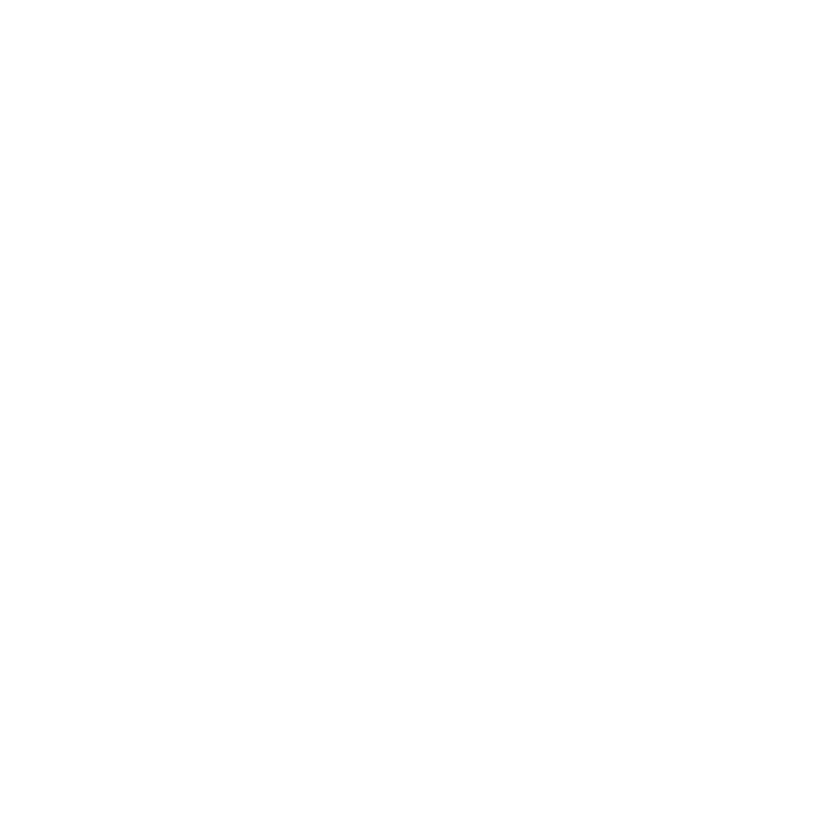

In [17]:
data <- melt(z_df)
ggplot(z_df, aes(x=crim)) +
    geom_histogram(binwidth = .1)

No id variables; using all as measure variables


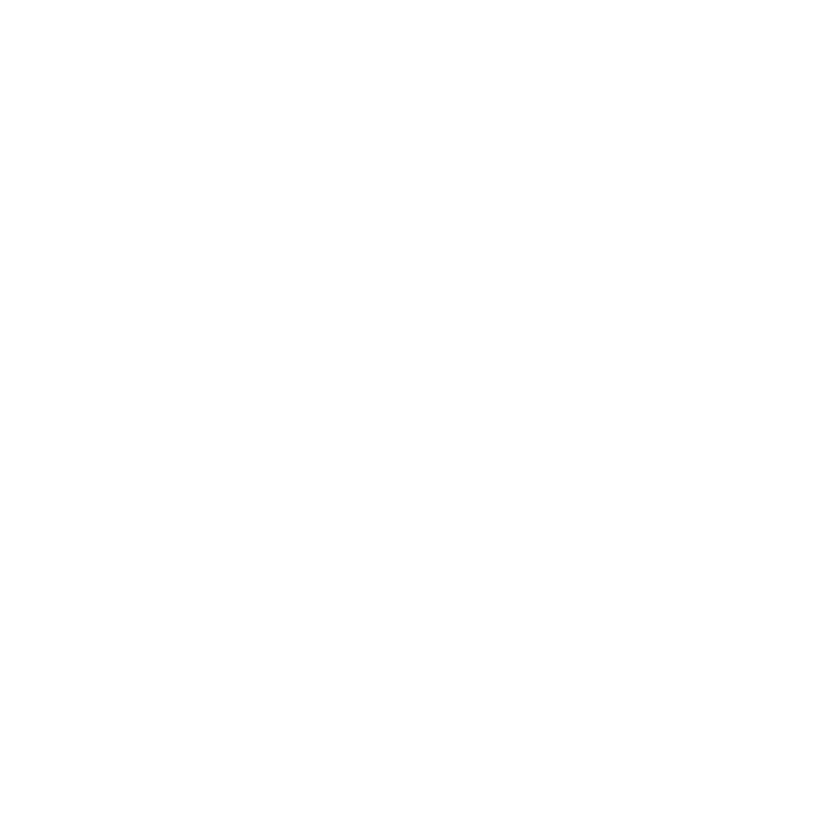

In [14]:
data <- melt(z_df)
ggplot(data, aes()) +
    geom_tile(aes(fill = rescale), color = "white") +
    scale_fill_gradient(low = "white", high = "steelblue")